#### Data split for taining and evaluation

In order to evaluate the performance of a model, especially for applications where you have lots of features, which makes it difficult to plot $f(x)$ and use any graphical methods for evaluation, a more systematic way would be to train and evaluate the model with different splits of data.

<br><b>I. Train / Test split</b>
* Split the data into 2 subsets:
  * 70% - 80% training set
  * 20% - 30% test set 
* Train only with the training set and test only with the test set.
* Compute 2 cost functions:
  * Training $J_{train} = J(\vec{w},b) + reg\_term$ → <u>with</u> regularization
  * Test $J_{test} = J(\vec{w},b)$ → <u>without</u> regularizarion
* If the model overfits - then $J_{train}$ will be close to $0$ and $J_{test}$ will be high.
* This type of model evaluation is simple and fast, useful for quick prototyping or large datasets, but the performance estimate can be noisy — i.e. it depends heavily on how the data is split, therefore accidental overfit is possible due to tweaking the model based on test results (test leakage).

<br><b>II. Train / Validation / Test split</b> 
* Split the data into 2 subsets:
  * 60% training set
  * 20%  validation set
  * 20% test set
* Compute 3 cost functions:
  * Training $J_{train} = J(\vec{w},b) + reg\_term$ → <u>with</u> regularization
  * Validation $J_{cv} = J(\vec{w},b)$ → <u>without</u> regularizarion
  * Test $J_{test} = J(\vec{w},b)$ → <u>without</u> regularizarion
* "Cross validation set" is also called "development set" or "dev set"
* Try to fit several models and select the model with the lowest $J_{cv}$.
* In case of overfit - $J_{train}$ will be close to $0$ and $J_{cv}$ will be high.
* Finally, report a generalizarion error $J_{test}$  using the test set.
* This type of data split separates the model selection from final evaluation, giving a more reliable generalization estimate. It also helps prevent overfitting during model tuning. However if less data is available for training, which can be especially problematic for small datasets.  

#### Bias and variance during model evaluation
* Gives an idea how to improve the model further.
* High bias means the model underfits the dataset.
* High variance means the model overfits the dataset.
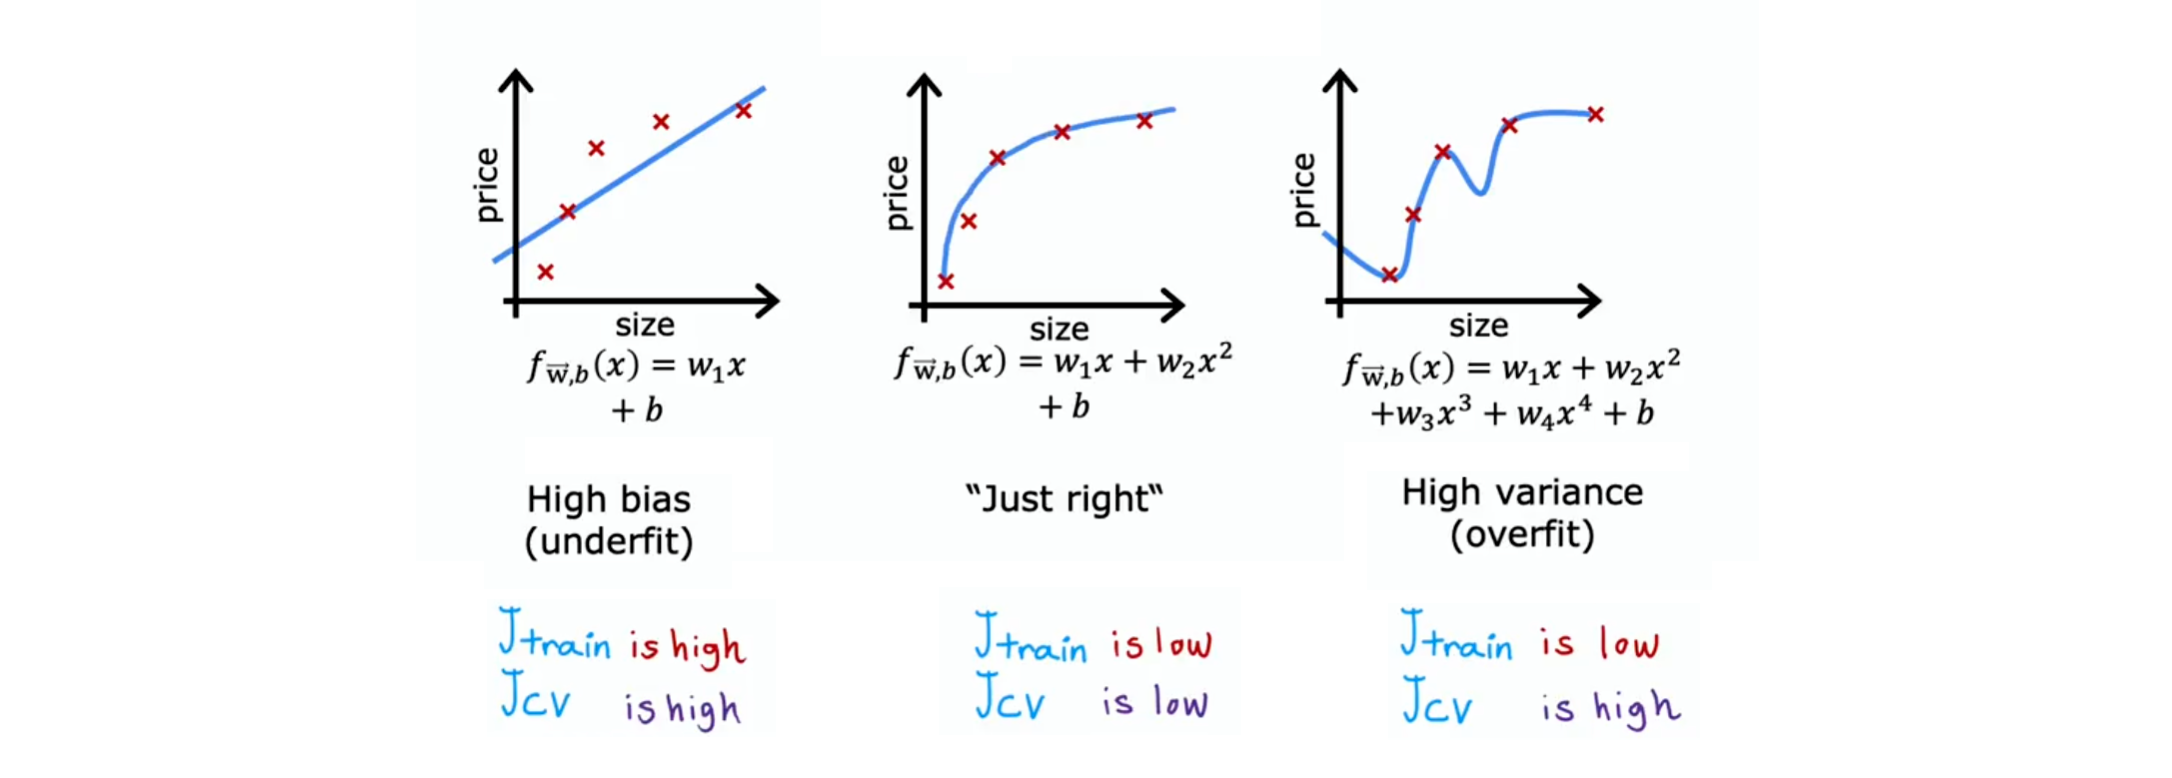

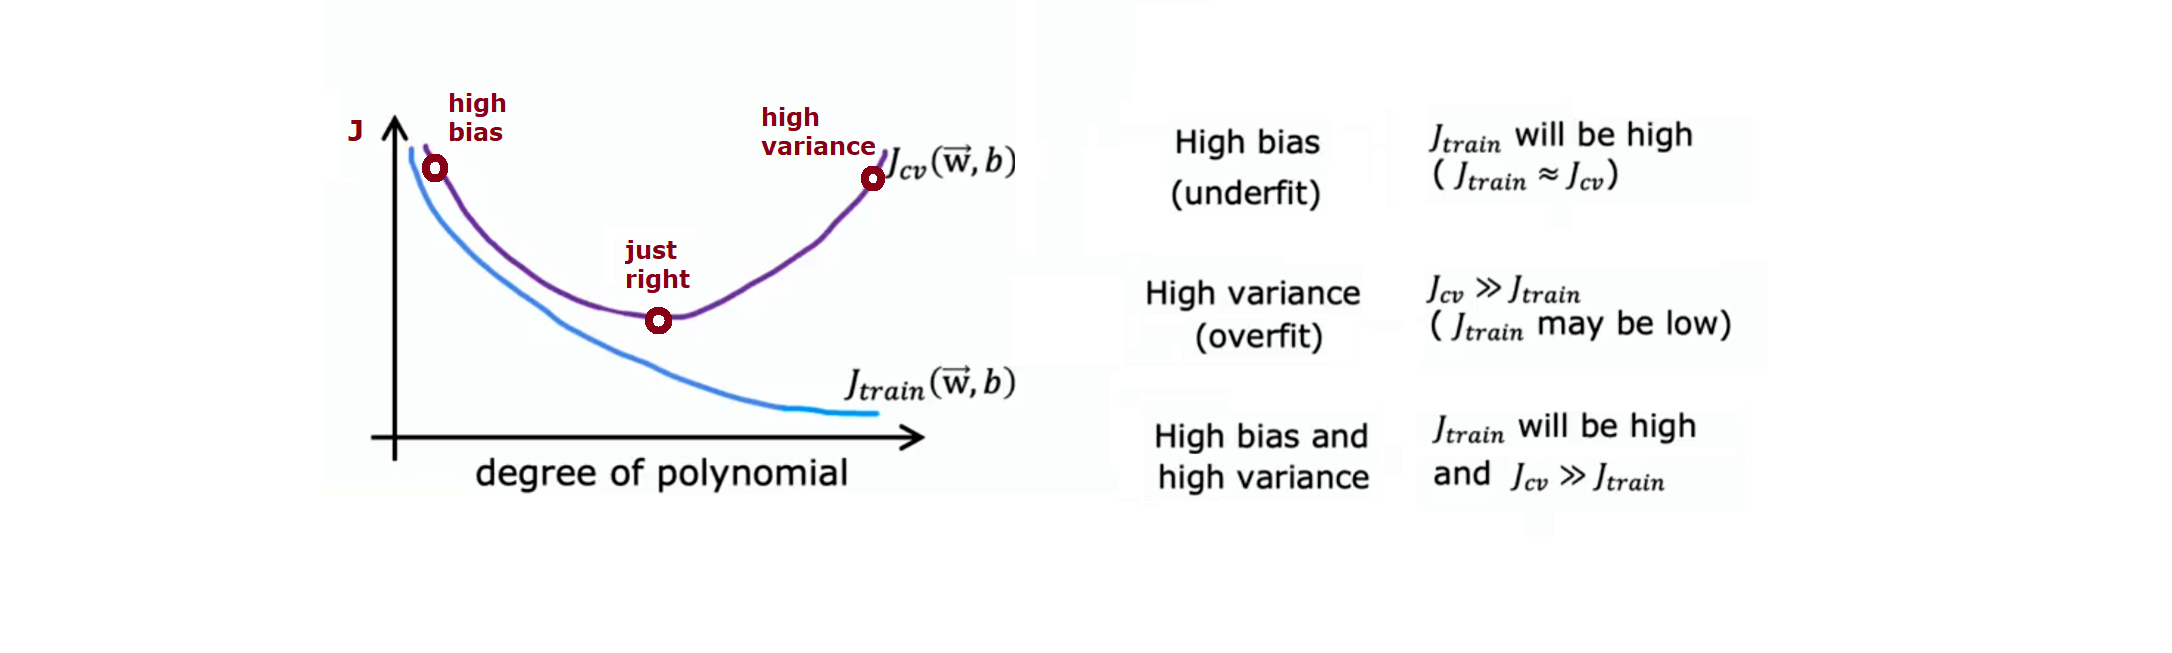
* If you plot $J_{train}$ as a function of the degree of polynomial $d$, as you fit a higher and higher degree polynomial (assuming for simplicity that  regularization is not used here) - $J_{train}$ tends to go down, since a higer order polynomial fits the training data better and better.
* If the degree of the polynomial is too low, $J_{cv}$ will be high because the model underfits the data (high bias). If the degree of polynomial is very large, $J_{cv}$ again will be high, because the model overfits (high variance).  
* If your learning algorithm has <u>high bias</u>, the key indicator will be if $J_{train}$ is high (corresponds to the  leftmost portion of the curve).
* If your learning algorithm has <u>high variance</u>, the key indicator will be if $J_{cv}$ is much greater than $J_{train}$ (corresponds to the  rightmost portion of the curve).
* If the performance of the learning algorithm is "just right" - it is somewhere in the middle, with a lower cross-validation error $J_{cv}$ and neither high bias nor high variance.
* In some cases, is possible to simultaneously have high bias and have high variance - it doesn't really happen for linear models, but if you're training a neural network, there are some applications where unfortunately you have high bias and high variance. One way to recognize that situation will be if $J_{train}$ is high, so you're not doing that well on the training set, but even worse, the cross-validation error $J_{cv}$ is again, even much larger than the training error. The intuition behind it is that for part of the input, you have a very complicated model that overfits on part of the input. But then for some reason, for other part of the input, it doesn't even fit the training data well, i.e it underfits for it. The indicator for that will be if the algorithm does poorly on the training set, and than if it even does much worse on the training set. 

#### Bias, variance and how regularization affects them 

* Regularization gets us the trade-off between keeping parameters small and fitting too well to the training data (overfitting).
* If $\lambda$ is very large, the algorithm is highly motivated to keep the parameters $w$ very small. The model would therefore approximate a streight line: $f_{w,b}(x) = b$ 
* If $\lambda = 0$ or is very small, there is no regularization. The algorithm may overfit (hight variance), resulting in small $J_{train}$ and high $J_{cv}$.
* If $\lambda$ is intermediate (appropriate), the algorithm is able to find such parameters $w$ that make both $J_{train}$ and $J_{cv}$ small ("just right"). 
* How to chose the regularization parameter $\lambda$?
  * Try the model with a set of $\lambda$, such as [0; 0.1; 0.2 ... 8; 9; 10] and calculate $J_{cv}$ for each one of them.
  * Pick the $\lambda$ and corresponding $w, b$ that minimize $J_{cv}$
  * Finally, report test error $J_{test} (w, b)$ 

#### Etablishing a base level of performance

It is used as a benchmark or reference point that helps you evaluate how well your model is performing. Real world data can be very noisy and it's often infeasible to get to 0% error rate. For example, you may think that you have a high bias problem because you are getting 10% training and 15% cross validation error on a computer vision application. however even a human can't perform better than 10% error. If you consider this at the baseline level, than you'll instead have a high variance problem, because the priority now would be minimizing the gap  between cross validation and training error.
 
* Reference:
  * Error of human level performance.  
  * Performance of another (previous) implementation or a competing algorithm.
  * Guess based on experience.
* Evaluation process:
  * Calculate $A) \; baseline \; level \; performance$  + $B) \; J_{train}$ +  $C) \; J_{cv}$ and the difference between these values.
  * The gap between $A$ and $B$ evaluates bias.
  * The gap between $B$ and $C$ evaluates variance.
* Examples of base level performance estimation:
  * high variance: $A$=10.6% &larr; (0.2%) &rarr; $B$=10.8% &larr; (4.0%) &rarr; $C$=14.8%
  * high bias: $A$=10.6% &larr; (4.4%) &rarr; $B$=15.0% &larr; (0.5%) &rarr; $C$=15.5%
  * high bias & high variance: $A$=10.6% &larr; (4.4%) &rarr; $B$=15.00% &larr; (4.7%) &rarr; $C$=19.7% 

#### Advantages of ML diagnostics

* To gain insigts into what is / isn't working right with a learning algorithm.
* To get guidance into improving it's performance.
* Diagnostics can take time to implement but also can save a lot of time!
* What to do if we get unacceptably large error in prediction
  * Get more training samples
  * Try smaller set of features
  * Try getting additional features
  * Try adding polynomial features
  * Try decreasing or increasing $\lambda$

